<a href="https://colab.research.google.com/github/shtomar-adb/DM-Gradient-Boosting-Algorithms/blob/main/DM_GBM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GBM classifier Techniques

In [6]:
!pip install catboost

In [69]:
from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from numpy import loadtxt
import lightgbm
import seaborn as sns
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn import datasets
from xgboost import DMatrix
from sklearn import XGBRanker
%matplotlib inline

Dataset used for Classifier is Iris dataset

In [8]:
#Loading Iris dataset for classification
iris = datasets.load_iris()

In [9]:
X = iris.data
y = iris.target

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

**XGBoost Classifier**

In [11]:
xgbClassifier = XGBClassifier(n_estimators=2000,
                    tree_method='hist',
                    subsample=0.67,
                    colsample_level=0.06,
                    verbose=0,
                    n_jobs=6,
                    random_state=1234)

In [12]:
xgbClassifier.fit(X_train,
              Y_train,
              eval_set = [(X_test, Y_test)],
              early_stopping_rounds=15,
              verbose=0)

XGBClassifier(colsample_level=0.06, n_estimators=2000, n_jobs=6,
              objective='multi:softprob', random_state=1234, subsample=0.67,
              tree_method='hist', verbose=0)

In [13]:
accuracy_xg = np.mean(xgbClassifier.predict(X_test) == Y_test)
print("XGBoost Classifier Accuracy: ", accuracy_xg)

XGBoost Classifier Accuracy:  0.9666666666666667


Catboost Classifier

In [14]:
cb = CatBoostClassifier(n_estimators=2000,
                        colsample_bylevel=0.06,
                        max_leaves=31,                        
                        verbose=0,
                        thread_count=6,
                        random_state=1234)

In [15]:
cb.fit(X_train,
      Y_train,
      eval_set = [(X_test, Y_test)],
      early_stopping_rounds=15,
      verbose=0)

In [16]:
accuracy_cat = np.mean(cb.predict(X_test) == Y_test)
print("CatBoost Classifier Accuracy: ", accuracy_cat)

CatBoost Classifier Accuracy:  0.3377777777777778


LGBM Classifier

In [17]:
lgbmClassifier = LGBMClassifier(n_estimators=2000,
                      feature_fraction=0.06,
                      bagging_fraction=0.67,
                      bagging_freq=1,
                      verbose=0,
                      n_jobs=6,
                      random_state=1234)

In [18]:
lgbmClassifier.fit(X_train,
              Y_train,
              eval_set = [(X_test, Y_test)],
              early_stopping_rounds=15,
              verbose=0)

LGBMClassifier(bagging_fraction=0.67, bagging_freq=1, feature_fraction=0.06,
               n_estimators=2000, n_jobs=6, random_state=1234, verbose=0)

In [19]:
accuracy_lgbm = np.mean(lgbmClassifier.predict(X_test) == Y_test)
print("LGBM Classifier Accuracy: ", accuracy_lgbm)

LGBM Classifier Accuracy:  0.9666666666666667


RandomForest Classifier

In [20]:
rfClassifier = RandomForestClassifier(n_estimators=500,
                            max_features=0.06,
                            n_jobs=6,
                            random_state=1234)

In [21]:
rfClassifier.fit(X_train, Y_train)

RandomForestClassifier(max_features=0.06, n_estimators=500, n_jobs=6,
                       random_state=1234)

In [22]:
accuracy_random_forest = np.mean(rfClassifier.predict(X_test) == Y_test)
print("Random Forest Classifier Accuracy: ", accuracy_random_forest)

Random Forest Classifier Accuracy:  0.9666666666666667


AdaBoost

In [23]:
base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06) 
abClassifier = AdaBoostClassifier(base_estimator=base_estim,
                        n_estimators=500,
                        learning_rate=0.5,
                        random_state=1234)

In [24]:
abClassifier.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         max_features=0.06),
                   learning_rate=0.5, n_estimators=500, random_state=1234)

In [25]:
accuracy_ada_classifier = np.mean(abClassifier.predict(X_test) == Y_test)
print("Ada Boost Classifier Accuracy: ", accuracy_ada_classifier)

Ada Boost Classifier Accuracy:  0.9333333333333333


Decision Tree

In [26]:
dtClassifier = DecisionTreeClassifier(max_depth=12, random_state=1234)

In [27]:
dtClassifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=12, random_state=1234)

In [28]:
accuracy_decision_tree = np.mean(dtClassifier.predict(X_test) == Y_test)
print("DecisionTree Classifier Accuracy: ", accuracy_decision_tree)

DecisionTree Classifier Accuracy:  0.9


**Plotting all the Classification Accuracies**

In [29]:
classifier_name = ["XGBoost", "Catboost", "LGBM", "RandomForest", "ADABoost", "DecisionTree"]
accuracies = [accuracy_xg, accuracy_cat, accuracy_lgbm, accuracy_random_forest, accuracy_ada_classifier, accuracy_decision_tree]

[Text(0, 0, 'XGBoost'),
 Text(0, 0, 'Catboost'),
 Text(0, 0, 'LGBM'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ADABoost'),
 Text(0, 0, 'DecisionTree')]

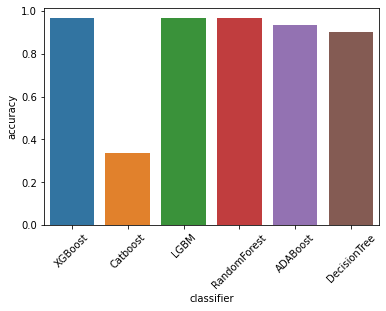

In [30]:
bar_plot = sns.barplot(x='classifier', y='accuracy', data=pd.DataFrame({"classifier": classifier_name, "accuracy": accuracies}))
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

## Gradient Boost Regression Techniques

The dataset used is the Diabetes dataset from scikit learn

In [31]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

XGBoost Regressor

In [33]:
xgb_regressor = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [34]:
xgb_regressor.fit(X_train,Y_train)

preds = xgb_regressor.predict(X_test)

[20:15:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
rmse_xgb = np.sqrt(mean_squared_error(Y_test, preds))
print("XGBoost Mean squared error", rmse_xgb)

XGBoost Mean squared error 64.55423174993108


CatBoost

In [36]:
cb_reg = CatBoostRegressor(iterations=500,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

In [37]:
cb_reg.fit(X_train, Y_train,
             eval_set=(X_test, Y_test),
             use_best_model=True,
             verbose=0)

In [38]:
preds = cb_reg.predict(X_test)

In [39]:
rmse_cat = np.sqrt(mean_squared_error(Y_test, preds))
print("Catboost Mean squared error", rmse_cat)

Catboost Mean squared error 59.13704189561667


LGBM Regressor

In [40]:
lgbm_reg = LGBMRegressor(objective ="regression", num_leaves = 35, random_state= 1)

In [41]:
lgbm_reg.fit(X_train, Y_train,
             eval_set=(X_test, Y_test),             
             verbose=0)

LGBMRegressor(num_leaves=35, objective='regression', random_state=1)

In [42]:
preds = lgbm_reg.predict(X_test)

In [43]:
rmse_lgbm = np.sqrt(mean_squared_error(Y_test, preds))
print("LGBM Mean squared error", rmse_lgbm)

LGBM Mean squared error 61.06276884867952


Plotting the results of Regression Root Mean squred errors.

In [44]:
regressor_name = ["XGBoost", "Catboost", "LGBM"]
rmse = [rmse_xgb, rmse_cat, rmse_lgbm]

[Text(0, 0, 'XGBoost'), Text(0, 0, 'Catboost'), Text(0, 0, 'LGBM')]

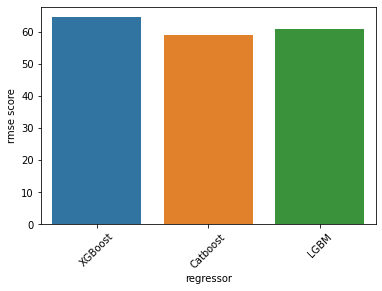

In [45]:
bar_plot = sns.barplot(x='regressor', y='rmse score', data=pd.DataFrame({"regressor": regressor_name, "rmse score": rmse}))
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45)

## GradientBoost Ranking Techniques

Data Preparation

In [59]:
df = pd.DataFrame({
    "query_id":[i for i in range(100) for j in range(10)],
    "var1":np.random.random(size=(1000,)),
    "var2":np.random.random(size=(1000,)),
    "var3":np.random.random(size=(1000,)),
    "relevance":list(np.random.permutation([0,0,0,0,0, 0,0,0,1,1]))*100
})

In [62]:
train_df = df[:800]  # first 80%
validation_df = df[800:]  # remaining 20%

qids_train = train_df.groupby("query_id")["query_id"].count().to_numpy()

In [63]:
train_df = df[:800]  # first 80%
validation_df = df[800:]  # remaining 20%

qids_train = train_df.groupby("query_id")["query_id"].count().to_numpy()
X_train = train_df.drop(["query_id", "relevance"], axis=1)
y_train = train_df["relevance"]

qids_validation = validation_df.groupby("query_id")["query_id"].count().to_numpy()
X_validation = validation_df.drop(["query_id", "relevance"], axis=1)
y_validation = validation_df["relevance"]

XGBoost

In [74]:
import xgboost as xgb

In [76]:
params = {'objective': 'rank:ndcg', 'learning_rate': 0.1,
          'gamma': 1.0, 'min_child_weight': 0.1,
          'max_depth': 6, 'n_estimators': 4}
model = xgb.sklearn.XGBRanker(**params)
model.fit(X_train, y_train, qids_train, verbose=True,
          eval_set=[(X_validation, y_validation)], eval_group=[qids_validation])
pred = model.predict(X_validation)

[0]	eval_0-map:0.305794
[1]	eval_0-map:0.375377
[2]	eval_0-map:0.33504
[3]	eval_0-map:0.301508


In [ ]:
pred

CatBoost

In [88]:
from catboost import CatBoostRanker, Pool


In [86]:
params = {
    'iterations': 2000,
    'custom_metric': ['NDCG', 'PFound', 'AverageGain:top=10'],
    'verbose': False,
    'random_seed': 0,
}
model = CatBoostRanker(**params)


In [93]:
cat_qids_train = train_df['query_id']
cat_X_train = train_df.drop(["query_id", "relevance"], axis=1)
cat_y_train = train_df["relevance"]

cat_qids_validation = validation_df['query_id']
cat_X_validation = validation_df.drop(["query_id", "relevance"], axis=1)
cat_y_validation = validation_df["relevance"]

In [96]:
train_pool = Pool(
    data=cat_X_train,
    label=cat_y_train,
    group_id=cat_qids_train
)

test_pool = Pool(
    data=cat_X_validation,
    label=cat_y_validation,
    group_id=cat_qids_validation
)

In [97]:
model.fit(train_pool, eval_set=test_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [99]:
model.predict(cat_X_validation)

array([ 0.57228239,  0.45973755, -0.72359971,  0.33664103, -0.12643046,
       -0.24106436,  0.3537769 ,  0.05498292, -0.21523924, -0.41168983,
       -0.70690838, -0.28457491,  0.37633403,  0.4184026 , -0.06152257,
        0.42546951,  0.31025479, -0.54539174, -0.19373572, -0.2369437 ,
       -0.07007728, -0.38245414, -0.4638588 , -0.11632199,  0.34838472,
        0.39181717, -0.45838139,  0.0683001 ,  0.18219633, -0.30509663,
       -0.54699241, -0.51971333, -0.22447714, -0.72823405, -0.01119517,
        0.02026234,  0.6757577 ,  0.46351183,  0.08112432,  0.41840706,
       -0.03834805, -0.43609529, -1.67053184,  0.11165952, -0.0486923 ,
        0.04509143,  0.16193583,  0.57803506,  0.57772205,  0.29656637,
        0.77366004,  0.20884124, -0.35892986,  0.25504507, -0.26328738,
       -0.26229753, -0.26717463,  0.62792495,  0.54431322, -0.26568111,
        0.2536938 ,  0.2539307 ,  0.47759234, -0.55972812,  0.57676686,
       -0.75572397,  0.16131892, -1.00526788,  0.54160252, -0.74

LightGBM

In [51]:
model = lightgbm.LGBMRanker(
    objective="lambdarank",
    metric="ndcg",
)

In [52]:
model.fit(
    X=X_train,
    y=y_train,
    group=qids_train,
    eval_set=[(X_validation, y_validation)],
    eval_group=[qids_validation],
    eval_at=10,
    verbose=10,
)

[10]	valid_0's ndcg@10: 0.534819
[20]	valid_0's ndcg@10: 0.510791
[30]	valid_0's ndcg@10: 0.518683
[40]	valid_0's ndcg@10: 0.50982
[50]	valid_0's ndcg@10: 0.513133
[60]	valid_0's ndcg@10: 0.496738
[70]	valid_0's ndcg@10: 0.503455
[80]	valid_0's ndcg@10: 0.493949
[90]	valid_0's ndcg@10: 0.500752
[100]	valid_0's ndcg@10: 0.506068


LGBMRanker(metric='ndcg', objective='lambdarank')

In [ ]:
model.predict(X_validation)